In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
sns.set()
sns.set_palette(sns.color_palette("viridis"))
sns.set_theme(style="white")
sns.set(font_scale=1.5)
sns.set(rc={'figure.figsize':(10, 10)})

In [2]:
df = pd.read_pickle('../TP3/data/simulation_runs_ys.pkl')
df, df.shape

(      white_y  run           t  ball_count  kinetic_energy
 0        47.0    0    0.000000        16.0    3.300000e+06
 1        47.0    0    0.586268        16.0    3.300000e+06
 2        47.0    0    0.586412        16.0    3.300000e+06
 3        47.0    0    0.586567        16.0    3.300000e+06
 4        47.0    0    0.586833        16.0    3.300000e+06
 ...       ...  ...         ...         ...             ...
 1921     56.0    9  423.658317         2.0    8.939061e+03
 1922     56.0    9  428.172020         1.0    5.855835e+03
 1923     56.0    9  436.738554         1.0    5.855835e+03
 1924     56.0    9  449.818790         1.0    5.855835e+03
 1925     56.0    9  462.637880         0.0    0.000000e+00
 
 [22256 rows x 5 columns],
 (22256, 5))

In [3]:
df['duration'] = -df.groupby(['white_y', 'run'])['t'].diff(-1)
# df.to_csv('output.csv', index=False)
df

,white_y,run,t,ball_count,kinetic_energy,duration
0,47.0,0,0.000000,16.0,3.300000e+06,0.586268
1,47.0,0,0.586268,16.0,3.300000e+06,0.000145
2,47.0,0,0.586412,16.0,3.300000e+06,0.000154
3,47.0,0,0.586567,16.0,3.300000e+06,0.000267
4,47.0,0,0.586833,16.0,3.300000e+06,0.000198
...,...,...,...,...,...,...
1921,56.0,9,423.658317,2.0,8.939061e+03,4.513702
1922,56.0,9,428.172020,1.0,5.855835e+03,8.566534
1923,56.0,9,436.738554,1.0,5.855835e+03,13.080236
1924,56.0,9,449.818790,1.0,5.855835e+03,12.819090


# Ejercicio 1.1

In [4]:
# Primero filtro con los valores de white_y dentro del rango
white_y_values = set(range(47, 57))
filtered_df = df[df['white_y'].isin(white_y_values)]

df['white_y'].unique(), filtered_df['white_y'].unique()

(array([47., 48., 49., 50., 51., 52., 53., 54., 55., 56.]),
 array([47., 48., 49., 50., 51., 52., 53., 54., 55., 56.]))

In [5]:
# Obtener el numero de bins para el histograma por Regla de Sturges
n_bins_sturges = int(np.ceil(np.log2(len(filtered_df['duration']) + 1))) 
n_bins_sturges

15

Mean time between events: 83.74385591600662  1080.3095504029068
Mean frequency of events: 747.3143535623179


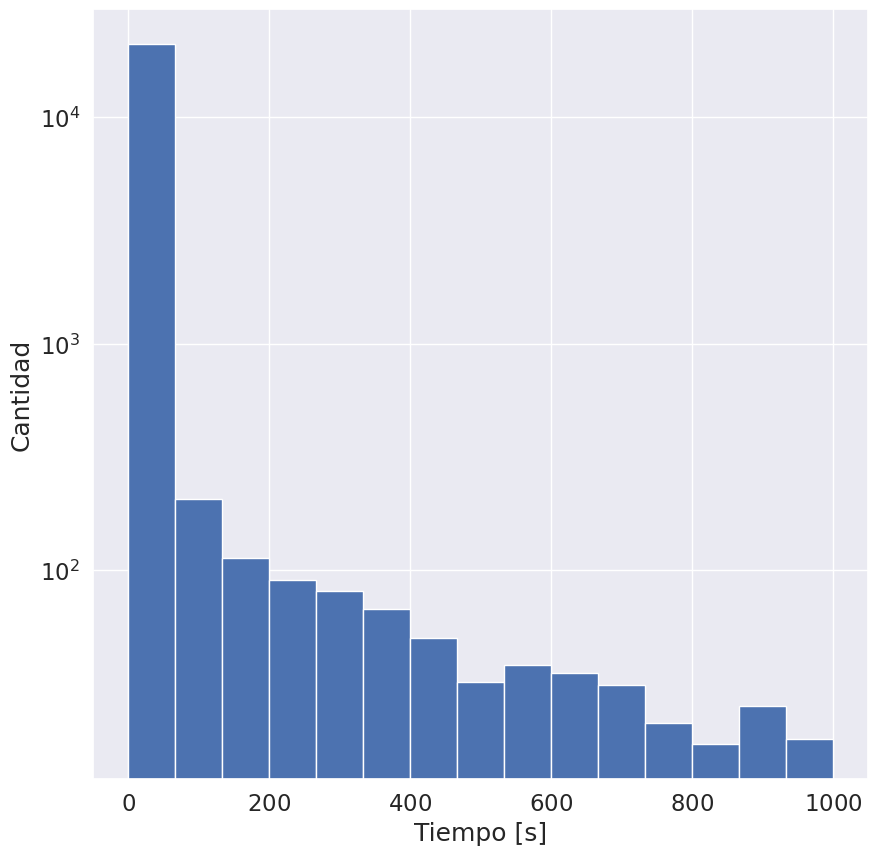

In [14]:
# Distribucion de tiempo entre eventos
ax = filtered_df['duration'].hist(bins=n_bins_sturges, range=[0, 1000])
ax.ticklabel_format(style='sci', useMathText=True)
ax.set_yscale('log')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Tiempo [s]')
# Tiempo medio entre eventos
print(f"Mean time between events: {filtered_df['duration'].mean()}  {filtered_df['duration'].std()}")
# Frecuencia media entre eventos
print(f"Mean frequency of events: {(1/filtered_df['duration']).mean()}")

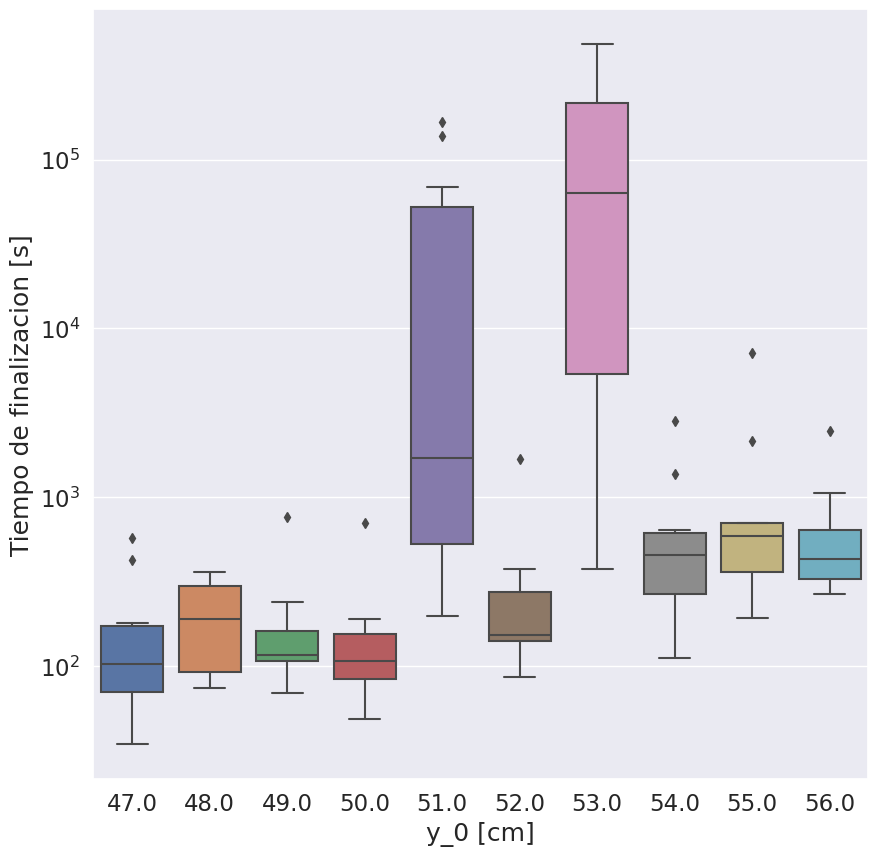

In [11]:
# Agarro los finales de las simulaciones
total = filtered_df[filtered_df['ball_count'] == 0].drop(columns=['ball_count', 'kinetic_energy', 'duration'])

#Distribucion de duracion total agrupados por la posicion de la blanca
ax = sns.boxplot(data=total, x ='white_y', y='t')
sns.set(font_scale=1.5)
plt.yscale('log')

ax.set_ylabel('Tiempo de finalizacion [s]')
ax.set_xlabel('y_0 [cm]')
plt.show()

In [8]:
df_speeds = pd.read_pickle('../TP3/data/simulation_runs_speeds.pkl')
df_speeds, df_speeds.shape

(      initial_speed  run          t  ball_count  kinetic_energy
 0             200.0    0   0.000000        16.0    3.300000e+06
 1             200.0    0   0.531495        16.0    3.300000e+06
 2             200.0    0   0.531636        16.0    3.300000e+06
 3             200.0    0   0.531648        16.0    3.300000e+06
 4             200.0    0   0.531790        16.0    3.300000e+06
 ...             ...  ...        ...         ...             ...
 2116         3200.0    9  22.917723         1.0    3.168175e+05
 2117         3200.0    9  24.174468         1.0    3.168175e+05
 2118         3200.0    9  26.021009         1.0    3.168175e+05
 2119         3200.0    9  26.493983         1.0    3.168175e+05
 2120         3200.0    9  28.697134         0.0    0.000000e+00
 
 [15324 rows x 5 columns],
 (15324, 5))

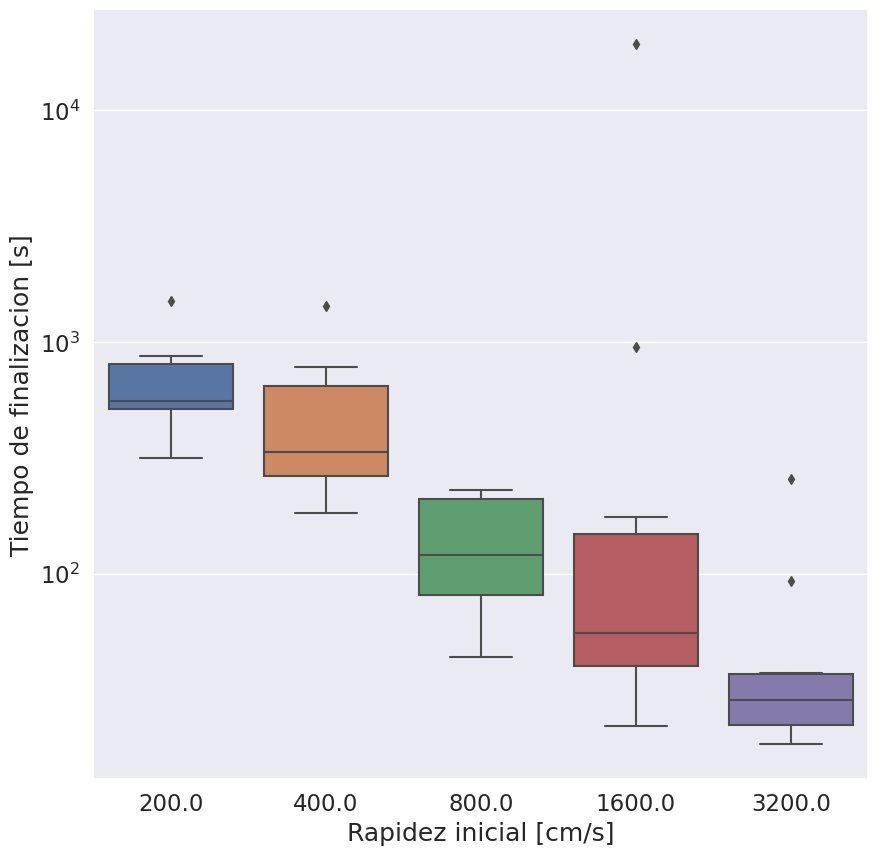

In [12]:
# Agarro los finales de las simulaciones
total = df_speeds[df_speeds['ball_count'] == 0].drop(columns=['ball_count', 'kinetic_energy'])

#Distribucion de duracion total agrupados por la posicion de la blanca
ax = sns.boxplot(data=total, x ='initial_speed', y='t')
plt.yscale('log')
sns.set(font_scale=1.5)
ax.set_ylabel('Tiempo de finalizacion [s]')
ax.set_xlabel('Rapidez inicial [cm/s]')



plt.show()